## Data 620 - Homework # 6 - 2 node Network Analysis  

In this assignment we will explore a small 2 node Network. The data represents attendance by Southern Women (only identify by first name) to 14 various event (enumarated from E1 - E14). The data is given adjancy matrix.  
The data set can be found at:  
http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/davis.dat  

To create the initial graph, we will use the built in algorith in Networkx: davis_southern_women_graph()  

In [1]:
import numpy as np

import networkx as nx
import networkx.algorithms.bipartite as bipartite

%matplotlib inline
import matplotlib.pyplot as plt

### Bipartite Graph Analysis

In [2]:
G = nx.davis_southern_women_graph()
women = G.graph['top']
event = G.graph['bottom']

print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G,women,event))

Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1


We will display some basic information about this graph and draw it.  

In [3]:
print(nx.info(G))
print ("Density: " + str(nx.density(G)))
print("Is bipartite: " + str(nx.is_bipartite(G)))

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 89
Average degree:   5.5625
Density: 0.179435483871
Is bipartite: True


We will draw the graph in a typical bipartite fashion with the nodes women on the left and nodes events on the right.  

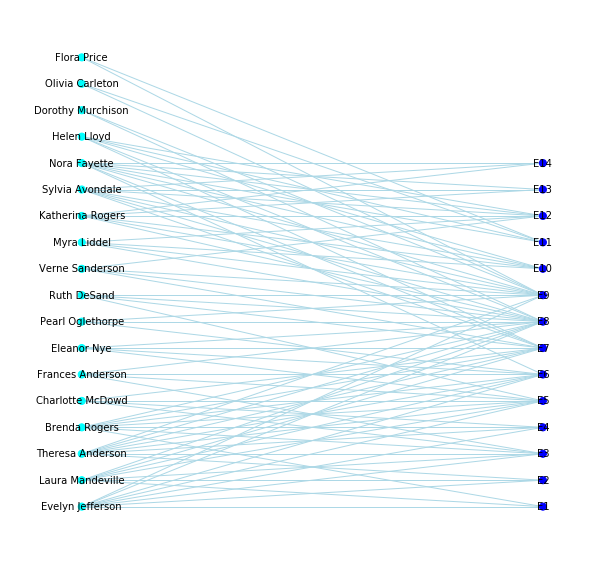

In [4]:
# Draw network 
plt.figure(figsize=(10,10))
plt.axis("off")

nodecolor = []
for node in G.nodes():
    a = 'blue' if node in event else 'aqua'
    nodecolor.append(a)
pos = dict()
pos.update( (n, (1, i*10)) for i, n in enumerate(women) ) # put nodes from Women at x=1
pos.update( (n, (3, i*10)) for i, n in enumerate(event) ) # put nodes from Event at x=2
nx.draw_networkx(G, pos=pos, with_labels=True,
        edge_color='lightblue', 
        node_color = nodecolor, node_size=50, font_size=10, font_color='k')

From the graph, we can see that everyone attended at leat one event and a few women attended quite a few events.  
Let us consider some of the centrality measure for this graph.  

In [5]:
def sorted_map(map):
    ms=sorted(map.iteritems(), key=lambda(k,v):(-v,k))
    return ms

# Degree
deg=bipartite.degrees(G, women)
deg
#sorted_map(deg)

({'E1': 3,
  'E10': 5,
  'E11': 4,
  'E12': 6,
  'E13': 3,
  'E14': 3,
  'E2': 3,
  'E3': 6,
  'E4': 4,
  'E5': 8,
  'E6': 8,
  'E7': 10,
  'E8': 14,
  'E9': 12},
 {'Brenda Rogers': 7,
  'Charlotte McDowd': 4,
  'Dorothy Murchison': 2,
  'Eleanor Nye': 4,
  'Evelyn Jefferson': 8,
  'Flora Price': 2,
  'Frances Anderson': 4,
  'Helen Lloyd': 5,
  'Katherina Rogers': 6,
  'Laura Mandeville': 7,
  'Myra Liddel': 4,
  'Nora Fayette': 8,
  'Olivia Carleton': 2,
  'Pearl Oglethorpe': 3,
  'Ruth DeSand': 4,
  'Sylvia Avondale': 7,
  'Theresa Anderson': 8,
  'Verne Sanderson': 4})

From this information, we can see that "Evelyn Jefferson", "Theresa Anderson", and "Nora Fayette", attended the most events and reciproquely, Event 8 and 9 were the most attended.  

In [6]:
#Degree Centrality
dc=bipartite.degree_centrality(G, women)
# Top 5 nodes with highest Degree Centrality
sorted_map(dc)[0:6]

[('E8', 0.7777777777777777),
 ('E9', 0.6666666666666666),
 ('Evelyn Jefferson', 0.5714285714285714),
 ('Nora Fayette', 0.5714285714285714),
 ('Theresa Anderson', 0.5714285714285714),
 ('E7', 0.5555555555555556)]

In [7]:
# Closeness Centrality

cl=bipartite.closeness_centrality(G, women)
sorted_map(cl)[0:6]

[('E8', 0.8461538461538461),
 ('Evelyn Jefferson', 0.8),
 ('Nora Fayette', 0.8),
 ('Theresa Anderson', 0.8),
 ('E9', 0.7857142857142857),
 ('Sylvia Avondale', 0.7741935483870968)]

Once again, we have "Evelyn Jefferson", "Nora Fayette", and "Theresa Anderson" with the highest closeness coefficient for women nodes and event E8 and E9 with the highest for event nodes.  

We will now look at betweenness centrality measure for the bipartite graph.  

In [8]:
bet=bipartite.betweenness_centrality(G, women)
sorted_map(bet)[0:6]

[('E8', 0.24381946234957552),
 ('E9', 0.22551359177204097),
 ('E7', 0.12950174424519845),
 ('Nora Fayette', 0.11346136204298478),
 ('Evelyn Jefferson', 0.09658472108029267),
 ('Theresa Anderson', 0.08759468547944678)]

Node "Nora Fayette" has the highest betweenness centrality measure for women node while Events 8, 9, and 7 have the hightest for events nodes.  

We will now look at clustering coefficient for nodes.  


In [9]:
clu=bipartite.clustering(G, nodes=None, mode='dot')
sorted_map(clu)[0:6]

[('E3', 0.47048611111111116),
 ('E5', 0.4678921568627451),
 ('E10', 0.4033424908424909),
 ('E12', 0.40144230769230776),
 ('Theresa Anderson', 0.3718188674071027),
 ('E13', 0.3664772727272727)]

For women nodes, "Theresa Anderson" shows the highest clustering coefficient value, however, for the event nodes, the node that shows the highest coefficient is E3.  
Note; that for E3, the centrality measures where not in the top 6 values.  

### Single Node Graph Analysis  

We will now project the bipartite graph onto the women node and evaluat the graph as a single node graph.  Women will be connected to one another if they attended the same event. If a pair of women attended several events together, the weight of the edge will represent this.

In [10]:
# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print('')
print("#Friend meetings, Member")
for w in women:
    print('%d %s' % (W.degree(w,weight='weight'),w))


#Friend meetings, Member
50 Evelyn Jefferson
45 Laura Mandeville
57 Theresa Anderson
46 Brenda Rogers
24 Charlotte McDowd
32 Frances Anderson
36 Eleanor Nye
31 Pearl Oglethorpe
40 Ruth DeSand
38 Verne Sanderson
33 Myra Liddel
37 Katherina Rogers
46 Sylvia Avondale
43 Nora Fayette
34 Helen Lloyd
24 Dorothy Murchison
14 Olivia Carleton
14 Flora Price


In [11]:
print(nx.info(W))
print ("Density: " + str(nx.density(W)))
print("Is bipartite: " + str(nx.is_bipartite(W)))

Name: 
Type: Graph
Number of nodes: 18
Number of edges: 139
Average degree:  15.4444
Density: 0.908496732026
Is bipartite: False


{'Brenda Rogers': <matplotlib.text.Text at 0x9b2d630>,
 'Charlotte McDowd': <matplotlib.text.Text at 0x9b490b8>,
 'Dorothy Murchison': <matplotlib.text.Text at 0x9b39198>,
 'Eleanor Nye': <matplotlib.text.Text at 0x9b2d9e8>,
 'Evelyn Jefferson': <matplotlib.text.Text at 0x9b39550>,
 'Flora Price': <matplotlib.text.Text at 0x9dd4f60>,
 'Frances Anderson': <matplotlib.text.Text at 0x9b2dda0>,
 'Helen Lloyd': <matplotlib.text.Text at 0x9b49828>,
 'Katherina Rogers': <matplotlib.text.Text at 0x9b1f358>,
 'Laura Mandeville': <matplotlib.text.Text at 0x9b39908>,
 'Myra Liddel': <matplotlib.text.Text at 0x9b49470>,
 'Nora Fayette': <matplotlib.text.Text at 0x9b1f710>,
 'Olivia Carleton': <matplotlib.text.Text at 0x9b2d278>,
 'Pearl Oglethorpe': <matplotlib.text.Text at 0x9dd4ba8>,
 'Ruth DeSand': <matplotlib.text.Text at 0x9b39cc0>,
 'Sylvia Avondale': <matplotlib.text.Text at 0x9b1fac8>,
 'Theresa Anderson': <matplotlib.text.Text at 0x9dd4860>,
 'Verne Sanderson': <matplotlib.text.Text at 0x

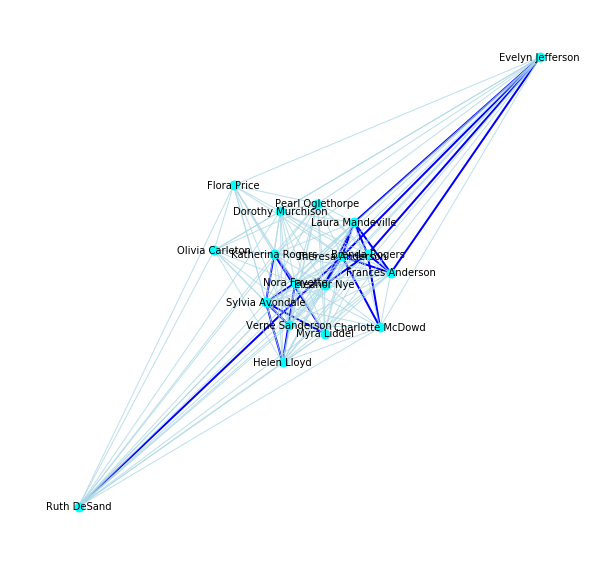

In [26]:
plt.figure(figsize=(10,10))
plt.axis("off")

elarge=[(u,v) for (u,v,d) in W.edges(data=True) if d['weight'] >3]
esmall=[(u,v) for (u,v,d) in W.edges(data=True) if d['weight'] <=3]

g_pos = nx.spring_layout(W)
#g_pos = nx.spectral_layout(W2)
 
# nodes
nx.draw_networkx_nodes(W,g_pos,node_size=80, node_color='aqua')

# edges
nx.draw_networkx_edges(W,g_pos,edgelist=elarge,
                    width=2, edge_color = 'blue')
nx.draw_networkx_edges(W,g_pos,edgelist=esmall,
                    width=1,alpha=0.8,edge_color='lightblue')

# labels
nx.draw_networkx_labels(W,g_pos,font_size=10,font_color='k',font_family='sans-serif')


#nx.draw_networkx(W, pos=spring_pos, with_labels=True,
#         width=weight, edge_color='lightblue', 
#        node_color = 'aqua', node_size=50, font_size=10, font_color='k')

In [25]:
d_w = nx.degree(W)
sorted_map(d_w)

[('Evelyn Jefferson', 17),
 ('Helen Lloyd', 17),
 ('Nora Fayette', 17),
 ('Ruth DeSand', 17),
 ('Sylvia Avondale', 17),
 ('Theresa Anderson', 17),
 ('Verne Sanderson', 17),
 ('Dorothy Murchison', 16),
 ('Katherina Rogers', 16),
 ('Myra Liddel', 16),
 ('Pearl Oglethorpe', 16),
 ('Brenda Rogers', 15),
 ('Eleanor Nye', 15),
 ('Frances Anderson', 15),
 ('Laura Mandeville', 15),
 ('Flora Price', 12),
 ('Olivia Carleton', 12),
 ('Charlotte McDowd', 11)]

In [24]:
cl_w = nx.closeness_centrality(W)
sorted_map(cl_w)

[('Evelyn Jefferson', 1.0),
 ('Helen Lloyd', 1.0),
 ('Nora Fayette', 1.0),
 ('Ruth DeSand', 1.0),
 ('Sylvia Avondale', 1.0),
 ('Theresa Anderson', 1.0),
 ('Verne Sanderson', 1.0),
 ('Dorothy Murchison', 0.9444444444444444),
 ('Katherina Rogers', 0.9444444444444444),
 ('Myra Liddel', 0.9444444444444444),
 ('Pearl Oglethorpe', 0.9444444444444444),
 ('Brenda Rogers', 0.8947368421052632),
 ('Eleanor Nye', 0.8947368421052632),
 ('Frances Anderson', 0.8947368421052632),
 ('Laura Mandeville', 0.8947368421052632),
 ('Flora Price', 0.7727272727272727),
 ('Olivia Carleton', 0.7727272727272727),
 ('Charlotte McDowd', 0.7391304347826086)]

In [23]:
bet_w = nx.closeness_centrality(W)
sorted_map(bet_w)

[('Evelyn Jefferson', 1.0),
 ('Helen Lloyd', 1.0),
 ('Nora Fayette', 1.0),
 ('Ruth DeSand', 1.0),
 ('Sylvia Avondale', 1.0),
 ('Theresa Anderson', 1.0),
 ('Verne Sanderson', 1.0),
 ('Dorothy Murchison', 0.9444444444444444),
 ('Katherina Rogers', 0.9444444444444444),
 ('Myra Liddel', 0.9444444444444444),
 ('Pearl Oglethorpe', 0.9444444444444444),
 ('Brenda Rogers', 0.8947368421052632),
 ('Eleanor Nye', 0.8947368421052632),
 ('Frances Anderson', 0.8947368421052632),
 ('Laura Mandeville', 0.8947368421052632),
 ('Flora Price', 0.7727272727272727),
 ('Olivia Carleton', 0.7727272727272727),
 ('Charlotte McDowd', 0.7391304347826086)]